In [1]:
import tifffile
import pims
import glob
import numpy as np
# sys.path.append(os.path.abspath("/home/jmamede/scripts/"))
# from support_pla import *

#THINGS TO CHANGE!!!!! Always keep /*.nd2 at the end
#For gui make a function with all this input for verification purposes when loading the files
dirname = "/home/jmamede/Data/pqbp1/with Nina and laura/OlderPlate/*.tiff"
# dirname = "D:/JM/20201222caru3/Carubyigfp_F2_Nh4cl_vitc_rutin_BVD002.nd2"

filelist = glob.glob(dirname)
# filelist.pop()
# filelist = filelist[2:3]



In [2]:
filelist

['/home/jmamede/Data/pqbp1/with Nina and laura/OlderPlate/project_E3.tiff',
 '/home/jmamede/Data/pqbp1/with Nina and laura/OlderPlate/project_G4b.tiff',
 '/home/jmamede/Data/pqbp1/with Nina and laura/OlderPlate/project_E3d.tiff',
 '/home/jmamede/Data/pqbp1/with Nina and laura/OlderPlate/project_F3a.tiff',
 '/home/jmamede/Data/pqbp1/with Nina and laura/OlderPlate/project_F4b.tiff',
 '/home/jmamede/Data/pqbp1/with Nina and laura/OlderPlate/project_F4.tiff',
 '/home/jmamede/Data/pqbp1/with Nina and laura/OlderPlate/project_G4d.tiff',
 '/home/jmamede/Data/pqbp1/with Nina and laura/OlderPlate/project_H3b.tiff',
 '/home/jmamede/Data/pqbp1/with Nina and laura/OlderPlate/project_F3c.tiff',
 '/home/jmamede/Data/pqbp1/with Nina and laura/OlderPlate/project_G3.tiff',
 '/home/jmamede/Data/pqbp1/with Nina and laura/OlderPlate/nina_plate5_additionalwells_E3d.tiff',
 '/home/jmamede/Data/pqbp1/with Nina and laura/OlderPlate/nina_plate5_additionalwells_E4b.tiff',
 '/home/jmamede/Data/pqbp1/with Nina an

In [3]:
frames = pims.open(filelist[4],java_memory='1024m')
frames
frames.bundle_axes = 'czyx'

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/api.py:207: UserWarning: <class 'pims.tiff_stack.TiffStack_tifffile'> errored: __init__() got an unexpected keyword argument 'java_memory'
  warn(message)
/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/api.py:207: UserWarning: <class 'pims.imageio_reader.ImageIOReader'> errored: The ImageIOReader requires imageio and (for imageio >= 2.5) imageio-ffmpeg to work.
  warn(message)
/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:409: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


Frame([[195,   0,   0, ..., 195, 390, 195],
       [195,   0, 195, ..., 195, 390, 390],
       [195,   0,   0, ..., 195, 390, 195],
       ...,
       [195, 195,   0, ...,   0,   0,   0],
       [390,   0, 195, ...,   0,   0,   0],
       [195,   0,   0, ...,   0, 195, 390]], dtype=uint16)
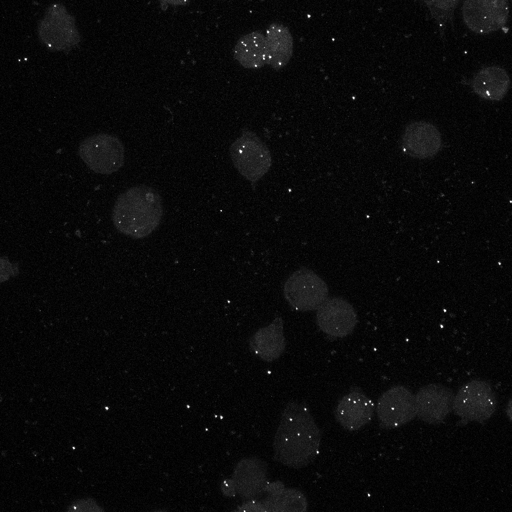

In [4]:
frames[0].astype(np.uint16).max(axis=1)[2]

In [5]:
for ficheiro in filelist:
    try:
        frames = pims.open(ficheiro,java_memory='1024m')
        frames.bundle_axes = 'czyx'
        prjfile = ficheiro[:-5]+'_PRJ.ome.tiff'
        print(prjfile)
        with tifffile.TiffWriter(prjfile, bigtiff=False , imagej=False) as tif:
            tif.save(frames[0].astype(np.uint16).max(axis=1),
    #                         compress='LZMA',
    #                         description = xml.to_xml(),
                            photometric='minisblack',
                            #datetime= True,
    #                         metadata= None,
    #                         contiguous=False,
                            )
        tif.close()
        frames.close()
    except: print(prjfile)
        
    

/home/jmamede/Data/pqbp1/with Nina and laura/OlderPlate/project_E3_PRJ.ome.tiff
/home/jmamede/Data/pqbp1/with Nina and laura/OlderPlate/project_G4b_PRJ.ome.tiff
/home/jmamede/Data/pqbp1/with Nina and laura/OlderPlate/project_E3d_PRJ.ome.tiff
/home/jmamede/Data/pqbp1/with Nina and laura/OlderPlate/project_F3a_PRJ.ome.tiff
/home/jmamede/Data/pqbp1/with Nina and laura/OlderPlate/project_F4b_PRJ.ome.tiff
/home/jmamede/Data/pqbp1/with Nina and laura/OlderPlate/project_F4_PRJ.ome.tiff
/home/jmamede/Data/pqbp1/with Nina and laura/OlderPlate/project_G4d_PRJ.ome.tiff
/home/jmamede/Data/pqbp1/with Nina and laura/OlderPlate/project_H3b_PRJ.ome.tiff
/home/jmamede/Data/pqbp1/with Nina and laura/OlderPlate/project_F3c_PRJ.ome.tiff
/home/jmamede/Data/pqbp1/with Nina and laura/OlderPlate/project_G3_PRJ.ome.tiff
/home/jmamede/Data/pqbp1/with Nina and laura/OlderPlate/nina_plate5_additionalwells_E3d_PRJ.ome.tiff
/home/jmamede/Data/pqbp1/with Nina and laura/OlderPlate/nina_plate5_additionalwells_E4b_PRJ.